In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualiztion Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Data Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Import Data using URL from GITHUB
url = 'https://raw.githubusercontent.com/vikasmishra0921/SupplyChain/refs/heads/main/SCM.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # Data Shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
12410,WH_112410,EID_62410,Rural,Mid,West,Zone 4,8,0,2,6969,...,0,59,19.0,2004.0,33,0,C,6,11,43131
1626,WH_101626,EID_51626,Rural,Large,North,Zone 5,5,1,3,5838,...,0,106,32.0,NaN,15,1,A+,4,17,20117
16125,WH_116125,EID_66125,Rural,Large,North,Zone 5,0,3,2,4064,...,0,189,28.0,NaN,13,0,B+,6,14,15141
14357,WH_114357,EID_64357,Rural,Small,West,Zone 6,0,0,4,4370,...,0,201,21.0,NaN,0,0,NaN,0,15,6055
21510,WH_121510,EID_71510,Rural,Large,West,Zone 6,7,1,3,5131,...,1,173,31.0,NaN,4,0,B+,2,6,4083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5182,WH_105182,EID_55182,Rural,Large,West,Zone 5,6,0,4,3496,...,1,142,24.0,NaN,9,1,A+,5,14,13125
9301,WH_109301,EID_59301,Rural,Large,West,Zone 6,4,0,2,6653,...,1,204,31.0,2018.0,6,0,A,3,23,9143
737,WH_100737,EID_50737,Rural,Mid,North,Zone 4,1,0,2,4573,...,0,104,16.0,NaN,16,0,C,6,26,22141
10190,WH_110190,EID_60190,Rural,Small,North,Zone 1,0,0,3,4749,...,0,213,29.0,NaN,10,0,C,5,21,13151


In [3]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
#Checking Data Description: Univariate Analysis
'''
The Following data is found to be Non Nomrally distributed
'''
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


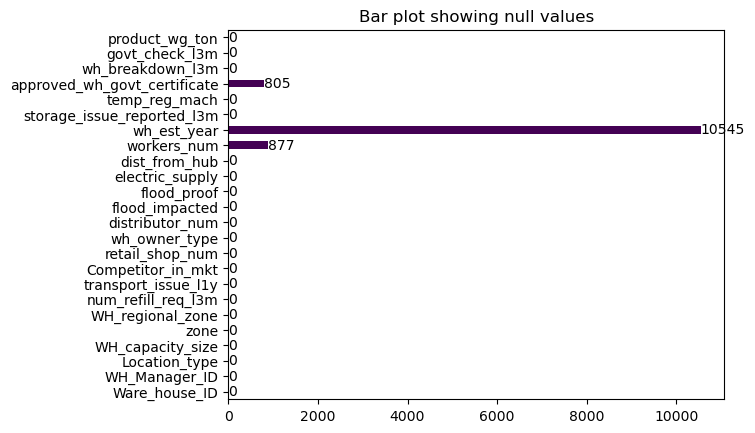

In [5]:
#Checking NUll Values in Dataset
ax = df.isnull().sum().plot(kind = 'barh', cmap = 'viridis')
ax.bar_label(ax.containers[0], fontsize=10); #for data labels customs
plt.title('Bar plot showing null values')
plt.show()

In [6]:
#Split NUmerical columns and categorical columns
numerical_data = df.select_dtypes(exclude = 'object')
categorical_data = df.select_dtypes(include = 'object')

In [7]:
#Calculate Missing value percentage:
(df['approved_wh_govt_certificate'].isnull().sum()/len(df['approved_wh_govt_certificate']))*100

3.6343115124153504

In [8]:
(df['wh_est_year'].isnull().sum()/len(df['wh_est_year']))*100

47.60722347629797

In [9]:
df['wh_est_year'].value_counts().head(10)

wh_est_year
2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: count, dtype: int64

In [10]:
df['wh_est_year'].quantile(0.75), df['wh_est_year'].quantile(0.25)

(2016.0, 2003.0)

In [11]:
df['wh_est_year'].mean()

2009.4012063765617

In [12]:
df['wh_est_year'].median()

2009.0

In [13]:
#Imputing the missing value with MEAN/MEDIAN as they are same
df['wh_est_year'].fillna(2009, inplace=True)

In [27]:
df['approved_wh_govt_certificate'].fillna('C', inplace=True)

In [18]:
(df['workers_num'].isnull().sum() / len(df['workers_num']))* 100

3.959367945823928

In [20]:
df['workers_num'].median(), df['workers_num'].mean()

(28.0, 28.93639825130447)

In [22]:
df['workers_num'].quantile(0.75), df['workers_num'].quantile(0.25)

(33.0, 24.0)

In [23]:
# whenever we are imputing any column by mean, median or by any constant value then please ensure the imputation must be integer value not the decimal or float value

In [25]:
df['workers_num'].fillna(28,inplace=True)

In [28]:
df.isnull().sum

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [30]:
# Seprate numerical and categorical column

categorical_column = df.select_dtypes(include = 'object')

In [42]:
Numerical_value = df.select_dtypes(exclude = 'object')

In [43]:
categorical_column

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,2009.0,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,2009.0,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,2009.0,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,2009.0,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,28.0,2009.0,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,2009.0,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,2009.0,13,0,3,28,15055


In [74]:
df.drop(columns=['Ware_house_ID	','WH_Manager_ID'],axis = 1, inplace = True)

KeyError: "['Ware_house_ID\\t'] not found in axis"

In [68]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [67]:
#evaluate the data for west zone
westzone= df[df['zone'] == 'West']
westzone

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
14,WH_100014,EID_50014,Rural,Small,West,Zone 6,8,1,4,5022,...,1,129,37.0,NaN,6,0,B,3,9,7055
16,WH_100016,EID_50016,Rural,Mid,West,Zone 4,0,0,2,5569,...,1,231,28.0,NaN,9,0,B+,5,11,12127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,WH_122119,EID_72119,Rural,Large,West,Zone 6,8,0,4,4687,...,1,160,26.0,2005.0,32,0,B,3,23,40086
22138,WH_122138,EID_72138,Rural,Mid,West,Zone 4,7,0,3,4686,...,1,148,28.0,2010.0,23,0,B+,6,11,29130
22139,WH_122139,EID_72139,Rural,Mid,West,Zone 3,5,0,4,3771,...,0,97,30.0,1998.0,24,0,C,2,19,30102
22140,WH_122140,EID_72140,Rural,Large,West,Zone 5,7,0,4,4593,...,1,78,24.0,2008.0,18,0,B+,6,14,21128


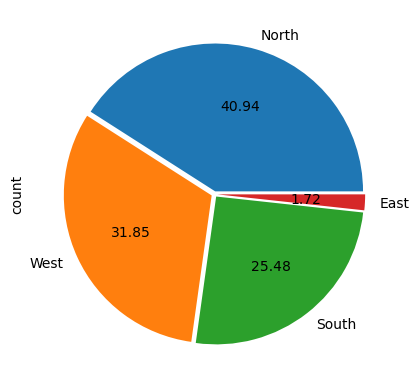

In [82]:
df['zone'].value_counts().plot(kind='pie',autopct = '%1.2f',explode = [0.02,0.02,0.02,0.02])
plt.show()

In [85]:
#evaluate the data for south zone
southzone= df[df['zone'] == 'South']
southzone

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,...,0,78,43.0,NaN,6,0,C,6,2,7130
13,WH_100013,EID_50013,Rural,Mid,South,Zone 4,6,1,2,6858,...,1,242,36.0,2008.0,22,1,A,5,11,30063
19,WH_100019,EID_50019,Rural,Small,South,Zone 1,1,1,2,5679,...,1,189,24.0,NaN,22,0,B,2,21,27100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22133,WH_122133,EID_72133,Rural,Large,South,Zone 5,7,0,2,5114,...,0,85,33.0,NaN,14,0,B,5,10,16063
22135,WH_122135,EID_72135,Urban,Large,South,Zone 5,8,0,4,4312,...,0,194,21.0,2014.0,19,1,A,2,25,26114
22136,WH_122136,EID_72136,Urban,Small,South,Zone 1,3,1,2,5792,...,0,217,21.0,2012.0,19,0,B,2,31,22082
22144,WH_122144,EID_72144,Rural,Small,South,Zone 6,1,2,3,3325,...,1,160,37.0,NaN,9,0,B,5,9,10068


In [87]:
#evaluate the data for North zone
northzone= df[df['zone'] == 'North']
northzone

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,...,0,241,23.0,NaN,18,0,C,6,24,24093
10,WH_100010,EID_50010,Rural,Large,North,Zone 6,7,1,3,4623,...,1,150,37.0,1999.0,17,0,B+,4,6,21125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22141,WH_122141,EID_72141,Rural,Mid,North,Zone 2,0,2,3,4844,...,1,211,34.0,NaN,4,0,B,2,18,5069
22142,WH_122142,EID_72142,Rural,Large,North,Zone 6,5,0,2,6080,...,0,182,29.0,1998.0,34,0,C,2,28,46138
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,99,22.0,NaN,20,0,B+,6,4,24072


In [88]:
#evaluate the data for East zone
Eastzone= df[df['zone'] == 'East']
Eastzone

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
37,WH_100037,EID_50037,Rural,Mid,East,Zone 3,0,1,8,6804,...,0,77,29.0,NaN,17,0,B,4,27,19100
86,WH_100086,EID_50086,Rural,Small,East,Zone 1,4,0,4,4564,...,1,160,37.0,1996.0,28,1,A+,5,31,39115
127,WH_100127,EID_50127,Rural,Small,East,Zone 1,8,0,8,3948,...,1,161,25.0,2011.0,15,0,B,5,31,19124
313,WH_100313,EID_50313,Rural,Mid,East,Zone 3,0,0,4,5299,...,1,270,27.0,NaN,8,0,B+,3,27,9131
367,WH_100367,EID_50367,Rural,Mid,East,Zone 4,8,0,6,3614,...,0,265,24.0,2006.0,34,1,C,3,26,45068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21981,WH_121981,EID_71981,Rural,Small,East,Zone 6,6,2,7,8781,...,0,139,40.0,2012.0,8,0,B+,2,15,10100
22017,WH_122017,EID_72017,Rural,Small,East,Zone 1,6,1,6,3610,...,0,218,18.0,NaN,14,0,B+,6,16,16088
22058,WH_122058,EID_72058,Rural,Mid,East,Zone 3,8,0,7,5234,...,1,251,26.0,2019.0,7,1,C,1,27,10148
22091,WH_122091,EID_72091,Rural,Mid,East,Zone 4,4,0,6,4704,...,0,165,19.0,2003.0,35,1,A+,2,26,47088
